<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/Praktikum_Mandiri04/Praktikum_Mandiri4_RegresiLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

In [62]:
# Memanggil data set lewat gdrive
path = '/content/drive/MyDrive/Praktikum 04 Mandiri/data'

In [63]:
# Membaca data file CSV
df = pd.read_csv(path + '/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [64]:
# Memisahkan dataset menjadi fitur (X) dan target (y) untuk machine learning
X = df.drop(['ID', 'Beli_Mobil'], axis=1)
y = df['Beli_Mobil']

In [65]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Mendefinisikan langkah preprocessing: semua fitur numerik akan diskalakan (StandardScaler)
numerical_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

In [67]:
# Membuat alur kerja (pipeline) yang menggabungkan preprocessing dan model machine learning
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [68]:
# Melatih keseluruhan pipeline (preprocessing + model) menggunakan data latih
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [69]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [70]:
# Menghitung berbagai metrik untuk mengukur seberapa baik performa model.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n--- Hasil Evaluasi Model ---")
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


--- Hasil Evaluasi Model ---
Akurasi: 0.9250
Presisi: 0.9353
Recall: 0.9559
F1-score: 0.9455
ROC AUC Score: 0.9646


In [71]:
# Menampilkan laporan klasifikasi yang lebih rinci
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        64
           1       0.94      0.96      0.95       136

    accuracy                           0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200




Confusion Matrix:


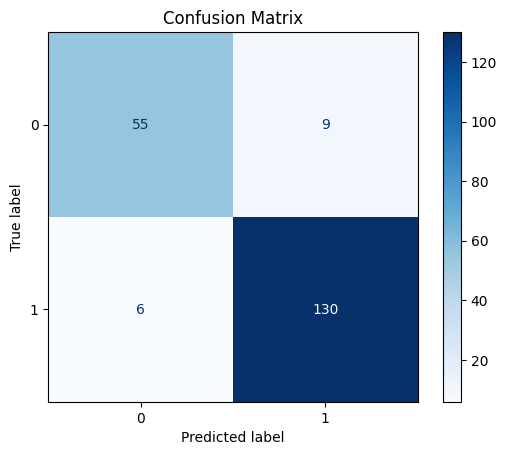


Kurva ROC (Receiver Operating Characteristic):


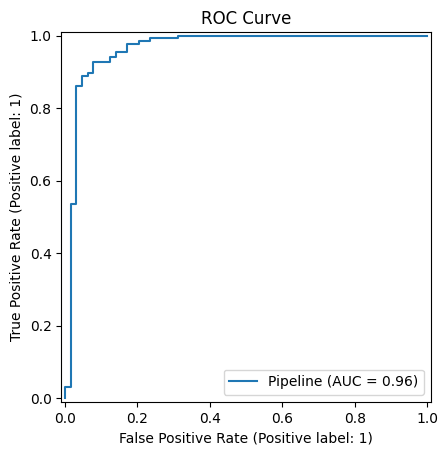

In [72]:
# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Menampilkan Kurva ROC
print("\nKurva ROC (Receiver Operating Characteristic):")
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()